In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("moviereviews.csv")

In [62]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [63]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.notnull()

,label,review
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
1995,True,True
1996,True,True
1997,True,True
1998,True,True


In [39]:
df["review"].len()

AttributeError: 'Series' object has no attribute 'len'

In [66]:
review_len = pd.DataFrame(data = df["review"].str.len())
review_len

,review
0,2250
1,3503
2,3869
3,5584
4,4327
...,...
1995,6835
1996,4026
1997,5010
1998,3424


In [49]:
review_len['review'] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [56]:
df.drop(df.loc[df["review"].str.isspace() == True],axis = 1,inplace = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Empty DataFrame

In [76]:
empty = pd.DataFrame(df.loc[df["review"].str.isspace() == True])
empty_list = list(empty.index)


In [84]:
df.drop(empty_list,inplace= True)

In [86]:
df["label"].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv = CountVectorizer(stop_words="english")

In [110]:
bad_review = pd.DataFrame(df.loc[df["label"] == "neg"])
bad_review_list = list(bad_review["review"])

In [111]:
sparse_matrix = cv.fit_transform(bad_review_list)

In [97]:
cv.vocabulary_

{'films': 9152,
 'like': 14210,
 'mouse': 15983,
 'hunt': 11855,
 'theatres': 24529,
 'isn': 12921,
 'law': 13916,
 'diabolical': 6683,
 'load': 14353,
 'claptrap': 4469,
 'steven': 23318,
 'speilberg': 22873,
 'dreamworks': 7397,
 'studio': 23583,
 'hollywood': 11543,
 'family': 8836,
 'fare': 8867,
 'deadly': 6124,
 'worst': 27168,
 'takes': 24183,
 'bare': 2144,
 'threads': 24630,
 'plot': 18292,
 'tries': 25188,
 'prop': 19010,
 'overacting': 17214,
 'flat': 9302,
 'stupid': 23615,
 'slapstick': 22308,
 'makes': 14793,
 'comedies': 4820,
 'jingle': 13137,
 'way': 26680,
 'look': 14450,
 'decent': 6182,
 'comparison': 4901,
 'writer': 27224,
 'adam': 675,
 'rifkin': 20530,
 'director': 6839,
 'gore': 10435,
 'verbinski': 26198,
 'names': 16206,
 'chiefly': 4258,
 'responsible': 20296,
 'swill': 24047,
 'worth': 27169,
 'concerns': 5018,
 'brothers': 3323,
 'nathan': 16249,
 'lane': 13816,
 'appalling': 1386,
 'lee': 14002,
 'evens': 8384,
 'inherit': 12478,
 'poorly': 18449,
 'run':

In [98]:
cv.vocabulary_.viewitems()

AttributeError: 'dict' object has no attribute 'viewitems'

In [113]:
sparse_matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), sparse_matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1][:20]))

TypeError: 'int' object is not subscriptable

In [103]:
freqs

In [114]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [115]:
sparse_matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), sparse_matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1][:20]))

TypeError: 'int' object is not subscriptable

In [116]:
from sklearn.model_selection import train_test_split

In [118]:
X = df["review"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [126]:
pipe = Pipeline([("tfidf", TfidfVectorizor()), ("svc", SVC())] )

NameError: name 'TfidfVectorizor' is not defined

In [127]:
vect = TfidfVectorizer(stop_words="english")


In [132]:
X_train_idf = vect.fit_transform(X_train)
X_test_idf =vect.transform(X_test)


In [133]:
rbf_svc = SVC()
rbf_svc.fit(X_train_idf,y_train)

SVC()

In [136]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [137]:
def report(model):
    preds = model.predict(X_test_idf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_idf,y_test)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.83       191
         pos       0.84      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



D:\Downloads\Python\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


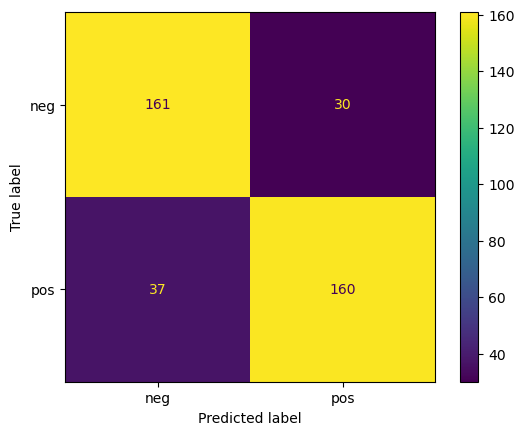

In [138]:
report(rbf_svc)

In [139]:
from sklearn.pipeline import Pipeline

In [141]:
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("svc", SVC())])

In [142]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [145]:
pipe.predict(["Bad movie"])
pipe.predict(["good movie"])

array(['neg'], dtype=object)

In [147]:
pipe.predict(["great movie"])

array(['pos'], dtype=object)